In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, how='outer', on='city')
# Display the data table for preview
combined_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

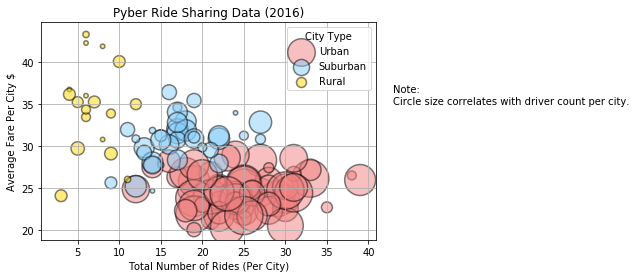

In [35]:
# Obtain the x and y coordinates for each of the three city types
byCity = combined_df.groupby('city')
# Calculate average fare by city
avgFareByCity = byCity.mean()['fare']

#Counting rides by city
rideByCity = byCity['ride_id'].count()

#Provide the total drivers by city
driverByCity = city_df.set_index('city')['driver_count']

# Provide city type 
cityType = city_df.set_index('city')['type']

#Create a DataFrame to store the data above
dataByCity = pd.DataFrame({
                 "Average Fare": avgFareByCity,
                 "Number of Rides": rideByCity,
                 "Number of Drivers": driverByCity,
                 "City Type": cityType
           })

# Build the scatter plots for each city types
urban = dataByCity.loc[dataByCity["City Type"]== "Urban"]
suburban = dataByCity.loc[dataByCity["City Type"]== "Suburban"]
rural = dataByCity.loc[pyber_cities["City Type"]== "Rural"]

plt.scatter(urban["Number of Rides"], urban["Average Fare"], color = "lightcoral", edgecolors="black", \
            s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], color = "lightskyblue", \
            edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, \
            linewidth = 1.5)

plt.scatter(rural["Number of Rides"], rural["Average Fare"], color = "gold", \
            edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", \
            alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare Per City $")

# Create a legend
plt.legend(frameon = True, loc= 0,title = 'City Type')

# Incorporate a text label regarding circle size
plt.text(43, 35,"Note:\nCircle size correlates with driver count per city.")
plt.grid()
# Save Figure
plt.savefig("RideSharingData.png")

# Show plot
plt.show()

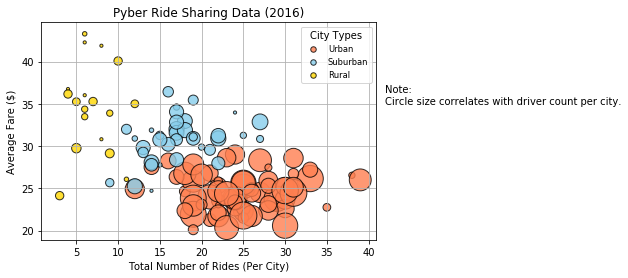

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

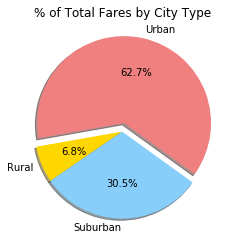

In [44]:
# Calculate Type Percents
fareByCity = combined_df.groupby(["type"])["fare"].sum()

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]
plt.title("% of Total Fares by City Type")
# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0, 0.1)
# Build Pie Chart
plt.pie(fareByCity, labels = fareByCity.index, autopct = "%1.1f%%", \
        colors = colors,shadow = True,explode =explode, startangle = 190)
# Save Figure
plt.savefig("FaresCityType.png")

# Show plot
plt.show()

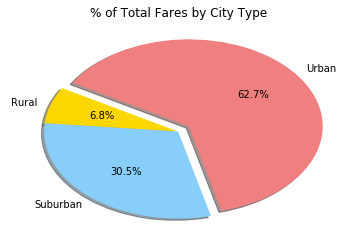

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

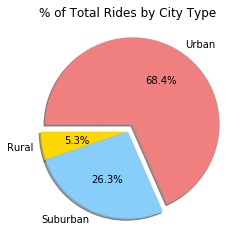

In [59]:
# Calculate Ride Percents
ridesByCity = combined_df.groupby(["type"])['ride_id'].count()

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]
plt.title("% of Total Rides by City Type")

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0, 0.1)
# Build Pie Chart
plt.pie(ridesByCity, labels = ridesByCity.index, autopct = "%1.1f%%", \
        colors = colors,shadow = True,explode =explode, startangle = 180)
# Save Figure
plt.savefig("RidesCityType.png")

# Show plot
plt.show()



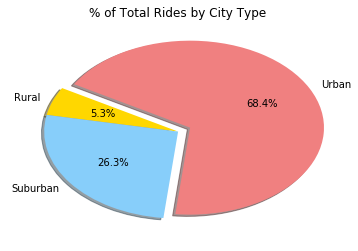

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

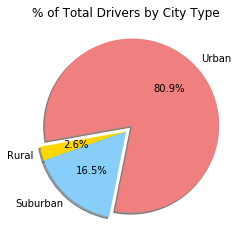

In [52]:
# Calculate Driver Percents
driversByCity = city_df.groupby(["type"])['driver_count'].sum()
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]
#Set the title
plt.title("% of Total Drivers by City Type")
# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0, 0.1)
# Build Pie Charts
plt.pie(driversByCity, labels = driversByCity.index, autopct = "%1.1f%%", \
        colors = colors,shadow = True,explode =explode, startangle = 190)
# Save Figure
plt.savefig("DriversCityType.png")

# Show plot
plt.show()


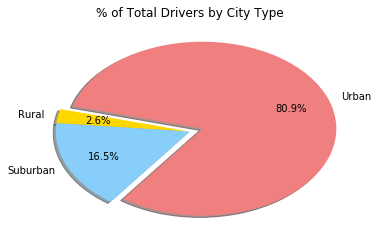

In [6]:
# Show Figure
plt.show()